In [51]:
pip install tensorflow


### IMPORTING LIBARIES

In [121]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### IMPORTING DATASET

In [124]:
power=pd.read_csv("Plant_1_Generation_Data.csv")
sensor=pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

### DATA PREPROCESSING

In [127]:
power=power.dropna()
sensor=sensor.dropna()
sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [129]:
power.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [131]:
power['DATE_TIME'] = pd.to_datetime(power['DATE_TIME'],format = '%d-%m-%Y %H:%M')


In [133]:
sensor['DATE_TIME'] = pd.to_datetime(sensor['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')


In [135]:
sensor.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [137]:
power = pd.merge(power.drop(columns = ['PLANT_ID']), sensor.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [139]:
power['DATE_TIME'] = pd.to_datetime(power['DATE_TIME'])
power['YEAR'] = power['DATE_TIME'].dt.year
power['MONTH'] = power['DATE_TIME'].dt.month
power['DAY'] = power['DATE_TIME'].dt.day
power['HOUR'] = power['DATE_TIME'].dt.hour
power['MINUTES'] = power['DATE_TIME'].dt.minute
power['MINUTES_PASS'] = power['HOUR'] * 60 + power['MINUTES']

In [141]:

unique_elements = power["SOURCE_KEY"].unique()
print("Unique Elements:", unique_elements)
power["SOURCE_KEY"], unique_labels = pd.factorize(power["SOURCE_KEY"])
print("\nDataFrame with Numeric Labels:")
print(power)

Unique Elements: ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']

DataFrame with Numeric Labels:
                DATE_TIME  SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0     2020-05-15 00:00:00           0       0.0       0.0          0.0   
1     2020-05-15 00:00:00           1       0.0       0.0          0.0   
2     2020-05-15 00:00:00           2       0.0       0.0          0.0   
3     2020-05-15 00:00:00           3       0.0       0.0          0.0   
4     2020-05-15 00:00:00           4       0.0       0.0          0.0   
...                   ...         ...       ...       ...          ...   
14844 2020-05-22 20:00:00     

## AC POWER VS TIME ##

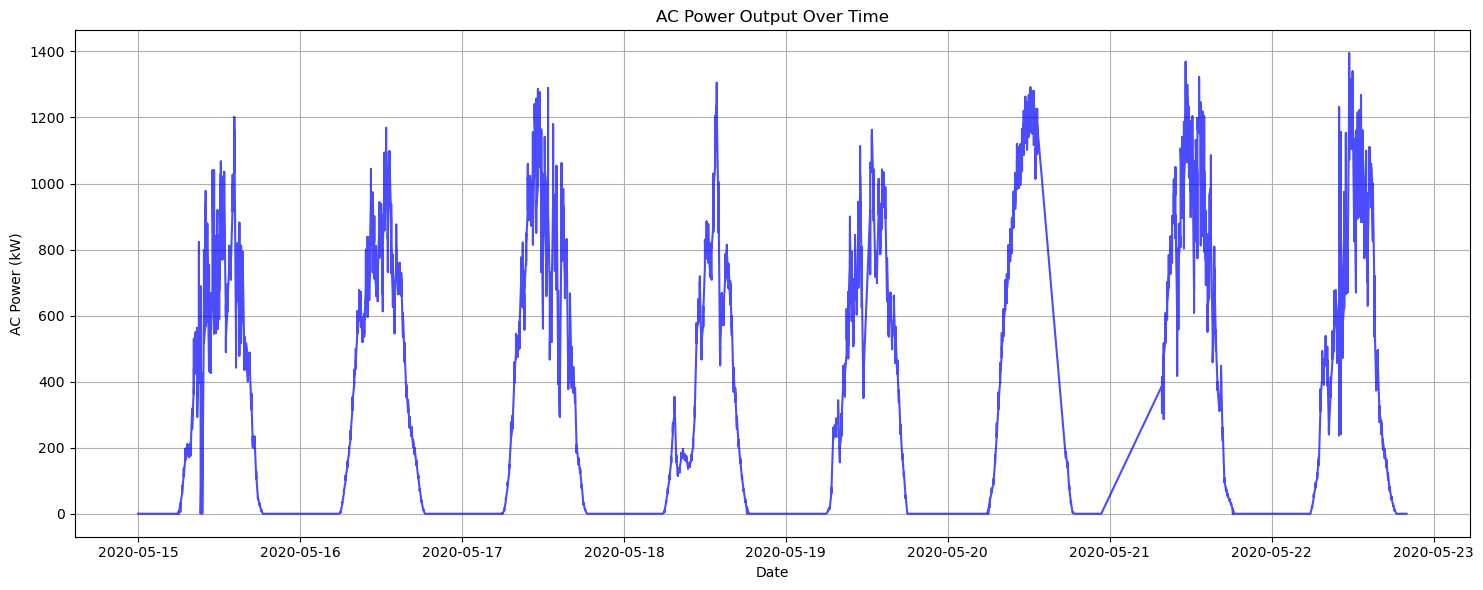

In [144]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
plt.plot(power['DATE_TIME'], power['AC_POWER'], color='blue', alpha=0.7)
plt.title('AC Power Output Over Time')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

## TEMPERATURE TRENDS COMPARISON ##

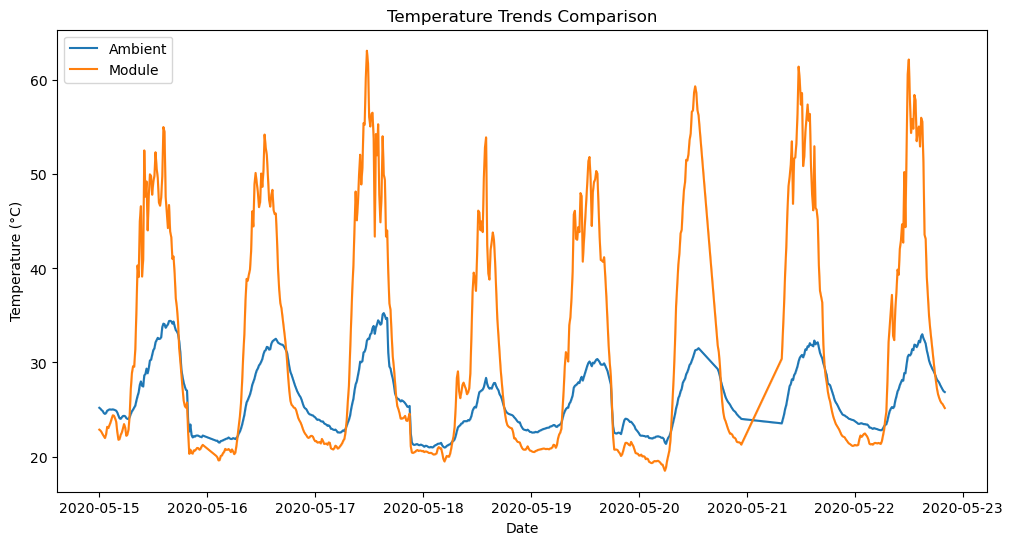

In [147]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=power['DATE_TIME'], y=power['AMBIENT_TEMPERATURE'], label='Ambient')
sns.lineplot(x=power['DATE_TIME'], y=power['MODULE_TEMPERATURE'], label='Module')
plt.title('Temperature Trends Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()



In [148]:
power=power[['SOURCE_KEY','AMBIENT_TEMPERATURE','AC_POWER','MODULE_TEMPERATURE','IRRADIATION','YEAR','MONTH','DAY','HOUR','MINUTES','MINUTES_PASS']]
power.head()

,SOURCE_KEY,AMBIENT_TEMPERATURE,AC_POWER,MODULE_TEMPERATURE,IRRADIATION,YEAR,MONTH,DAY,HOUR,MINUTES,MINUTES_PASS
0,0,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
1,1,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
2,2,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
3,3,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0
4,4,25.184316,0.0,22.857507,0.0,2020,5,15,0,0,0


In [149]:
X=power[['SOURCE_KEY','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','YEAR','MONTH','DAY','HOUR','MINUTES','MINUTES_PASS']]

In [150]:
X.head()
print(power.iloc[625])

SOURCE_KEY               21.000000
AMBIENT_TEMPERATURE      24.815960
AC_POWER                198.225000
MODULE_TEMPERATURE       28.888478
IRRADIATION               0.154713
YEAR                   2020.000000
MONTH                     5.000000
DAY                      15.000000
HOUR                      7.000000
MINUTES                  15.000000
MINUTES_PASS            435.000000
Name: 625, dtype: float64


In [151]:
Y=power[["AC_POWER"]]

### SPLITTING THE DATASET

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)

(11879, 10)


### XG BOOST

In [76]:
import xgboost as xgb
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1)
# Train the model
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
R2_Score = round(r2_score(Y_pred,Y_test) * 100, 2)
print(f"Mean Squared Error: {mse}")
print("R2 Score : ",R2_Score,"%")

Mean Squared Error: 1611.4176767512192
R2 Score :  98.91 %


### RANDOM FOREST

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,Y_test) * 100, 2)
MAE_rfr = mean_absolute_error(y_pred_rfr, Y_test)

print("R2 Score : ",R2_Score_rfr,"%")
print("MAE : ",MAE_rfr,"")

C:\Users\djivi\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2 Score :  98.99 %
MAE :  14.91138121494603 


In [80]:
prediction_rfr = rfr.predict(X_test)
print(prediction_rfr)

[ 474.20639288  500.39367264    4.46155357 ... 1018.42817841    0.
    0.        ]


In [81]:
print(Y_test)

          AC_POWER
5339    449.816667
736     495.428571
2316      3.885714
6954    562.812500
2416    200.042857
...            ...
2963   1071.625000
7384    750.342857
9094   1078.785714
8094      0.000000
11590     0.000000

[2970 rows x 1 columns]


### LSTM

In [83]:
print(power.columns)


Index(['SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'AC_POWER', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES',
       'MINUTES_PASS'],
      dtype='object')


In [84]:
power_numeric = power.select_dtypes(include=['number'])
# Apply MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(power_numeric)
# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=power_numeric.columns)
# Get target column index
target_column = normalized_df.columns.get_loc("AC_POWER")
print(target_column)

2


In [101]:
def create_sequences(data, target_column, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data.iloc[i+seq_length, target_column])
    return np.array(X), np.array(y)
seq_length = 10 
X, y = create_sequences(normalized_df, target_column=2, seq_length=seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

C:\Users\djivi\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - loss: 0.0164 - val_loss: 0.0033
Epoch 2/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 3/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 4/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 5/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 7/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 8/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 10/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 11/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 12/30
371/371 ━━━━━━━━━━━━

In [102]:
y_pred = model.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


In [103]:

y_test_reshaped = y_test.reshape(-1, 1)
combined = np.hstack((y_test_reshaped, y_pred))
comparison_df = pd.DataFrame(combined, columns=["Actual Values", "Predicted Values"])
print(comparison_df)


      Actual Values  Predicted Values
0          0.534191          0.511446
1          0.522813          0.515373
2          0.514421          0.515725
3          0.527654          0.513465
4          0.602049          0.561186
...             ...               ...
2963       0.000000         -0.000193
2964       0.000000         -0.000258
2965       0.000000         -0.000277
2966       0.000000         -0.000292
2967       0.000000         -0.000329

[2968 rows x 2 columns]


In [104]:
R2_Score = round(r2_score(y_pred,y_test_reshaped) * 100, 2)
MAE= mean_absolute_error(y_pred, y_test_reshaped)
MSE=mean_squared_error(y_test_reshaped,y_pred) 
print("R2 Score : ",R2_Score,"%")
print("MAE : ",MAE,"")
print("MSE : ",MSE,"")

R2 Score :  97.56 %
MAE :  0.025358149199012272 
MSE :  0.002193360507039449 


## ACTUAL AC POWER VS PREDICTED AC POWER ##

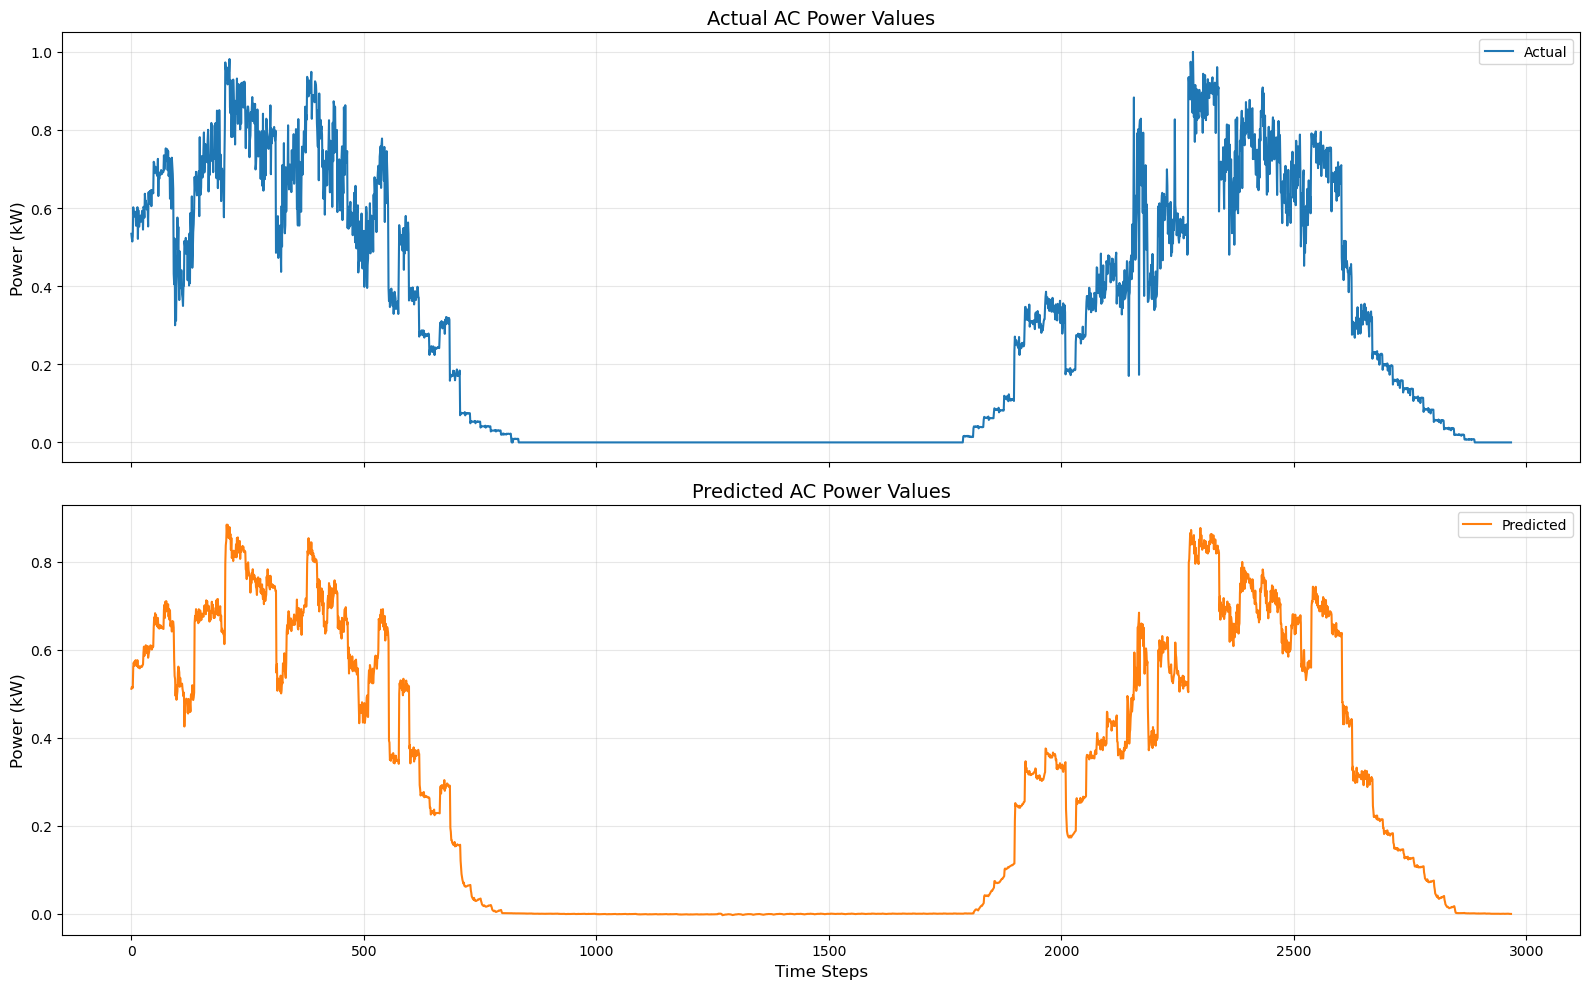

In [109]:


# Create time axis from test set indices
time_steps = np.arange(len(y_test_reshaped))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Actual Values Plot
ax1.plot(time_steps, y_test_reshaped, color='#1f77b4', label='Actual')
ax1.set_title('Actual AC Power Values', fontsize=14)
ax1.set_ylabel('Power (kW)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Predicted Values Plot
ax2.plot(time_steps, y_pred, color='#ff7f0e', label='Predicted')
ax2.set_title('Predicted AC Power Values', fontsize=14)
ax2.set_xlabel('Time Steps', fontsize=12)
ax2.set_ylabel('Power (kW)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

### INPUT FROM USER


In [115]:
def predict_from_input():
    feature_names = ['SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 
                     'IRRADIATION', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'MINUTES_PASS']    
    user_input = {}
    for feature in feature_names:
        user_input[feature] = float(input(f"Enter value for {feature}: "))
    user_input_df = pd.DataFrame([user_input])
    predicted_output = rfr.predict(user_input_df)
    print(f"\nPredicted AC Power Output: {predicted_output} kW")
predict_from_input()





Enter value for SOURCE_KEY:  21
Enter value for AMBIENT_TEMPERATURE:  24.81
Enter value for MODULE_TEMPERATURE:  28.88
Enter value for IRRADIATION:  0.154
Enter value for YEAR:  2020
Enter value for MONTH:  5
Enter value for DAY:  15
Enter value for HOUR:  7
Enter value for MINUTES:  15
Enter value for MINUTES_PASS:  435



Predicted AC Power Output: [194.19030357] kW
